<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/Skelar_task2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Завдання 2**


Ви аналітик даних у відділі Operational Excellence великого онлайн-маркетплейсу товарів. У складі маркетплейсу 2
сервіси:

- Платформа для роздрібного продажу.

- Платформа для гуртового продажу.

Після численних скарг про низьку якість роботи відділу підтримки, вам доручено проаналізувати, як можна покращити
рівень обслуговування клієнтів.

*Вхідні дані:*

Кожен продукт має свою команду підтримки.

Кожне завдання старанний агент служби підтримки може виконувати до 5 хвилин з момента взяття в роботу.

З боку менеджменту є очікування, що в рамках кожного дня середній час від виникнення нового запиту користувача до відповіді має бути 15 хвилин. Також погано, якщо користувачі сервісу чекають на відповідь довше 45 хвилин.

Проаналізуйте дані про роботу служби підтримки за період та запропонуйте шляхи для підвищення якості
обслуговування.

*Орієнтовний (але не вичерпний) приклад запитань для відповідей:*

1. Наскільки служба підтримки відповідає очікуванням менеджменту? Як вона працює зараз?

2. На яких агентів варто звернути увагу задля підвищення якості обслуговування?

3. Чи варто збільшити команду підтримки і наскільки?

4. Як варто змінити графік служби підтримки?

5. Чи є вигода від об'єднання команд?

***Опис даних:***

Таблиця events - дані про кожний запит до модерації. Містять в собі інформацію про сам запит та модератора, який його виконував.

*id_request* - унікальний ідентифікатор запиту;

*moderator* - унікальний ідентифікатор агента підтримки;

*team* - параметр команди (retail / wholesale);

*request_time* - час отримання запиту;

*start_time* - час початку обробки кейсу;

*finish_time* - час кінця обробки кейсу.

Результатом роботи мають бути:
1. Аргументовані висновки, підкріплені даними та графіками, оформлені в презентацію ~5-7 слайдів, сторінку в Notion чи Jupyter-ноутбук оформлений як презентація.
2. Файл з кодом/розрахунками.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/Task%202.csv')

In [3]:
df.head(20)

moderator  id_request         request_time           start_time  \
0         165      159660   2020-09-24 7:01:16  2020-10-01 16:00:31   
1         178      160116  2020-09-24 22:32:15  2020-10-01 13:21:42   
2         187      160178   2020-09-25 2:58:13  2020-10-02 11:37:16   
3         178      160306   2020-09-25 9:44:12   2020-10-02 7:23:09   
4         178      163042  2020-09-30 15:56:08   2020-10-02 7:37:33   
5         128      163426   2020-10-01 0:58:24   2020-10-01 7:07:31   
6         128      163427   2020-10-01 1:02:20   2020-10-01 8:03:58   
7         128      163428   2020-10-01 1:04:15   2020-10-01 7:09:57   
8         128      163429   2020-10-01 1:07:15   2020-10-01 7:12:06   
9         128      163431   2020-10-01 1:14:13   2020-10-01 7:16:04   
10        173      163432   2020-10-01 1:34:24   2020-10-01 7:25:04   
11        128      163437   2020-10-01 3:08:23   2020-10-01 7:17:06   
12        128      163438   2020-10-01 3:34:28   2020-10-01 7:19:25   
13        153      163440   2020-10-01 3:42:24   2020-10-01 8:00:28   
14        153      163441   2020-10-01 3:46:18   2020-10-01 8:16:37   
15        128      163444   2020-10-01 3:52:21   2020-10-01 7:22:06   
16        153      163445   2020-10-01 3:52:21   2020-10-01 8:20:18   
17        153      163446   2020-10-01 3:56:14   2020-10-01 8:22:14   
18        128      163455   2020-10-01 4:56:13   2020-10-01 7:22:47   
19        128      163456   2020-10-01 5:24:13   2020-10-01 7:25:55   

            finish_time       team  
0   2020-10-01 16:02:02     retail  
1   2020-10-01 13:21:43     retail  
2   2020-10-02 11:41:56  wholesale  
3    2020-10-02 7:25:33     retail  
4    2020-10-02 7:47:57     retail  
5    2020-10-01 7:08:22  wholesale  
6    2020-10-01 8:06:52  wholesale  
7    2020-10-01 7:12:06  wholesale  
8    2020-10-01 7:13:15  wholesale  
9    2020-10-01 7:17:05  wholesale  
10   2020-10-01 7:25:48     retail  
11   2020-10-01 7:19:24  wholesale  
12   2020-10-01 7:22:06  wholesale  
13   2020-10-01 8:16:36  wholesale  
14   2020-10-01 8:20:16  wholesale  
15   2020-10-01 7:22:46  wholesale  
16   2020-10-01 8:22:14  wholesale  
17   2020-10-01 8:23:33  wholesale  
18   2020-10-01 7:25:47  wholesale  
19   2020-10-01 7:27:03  wholesale

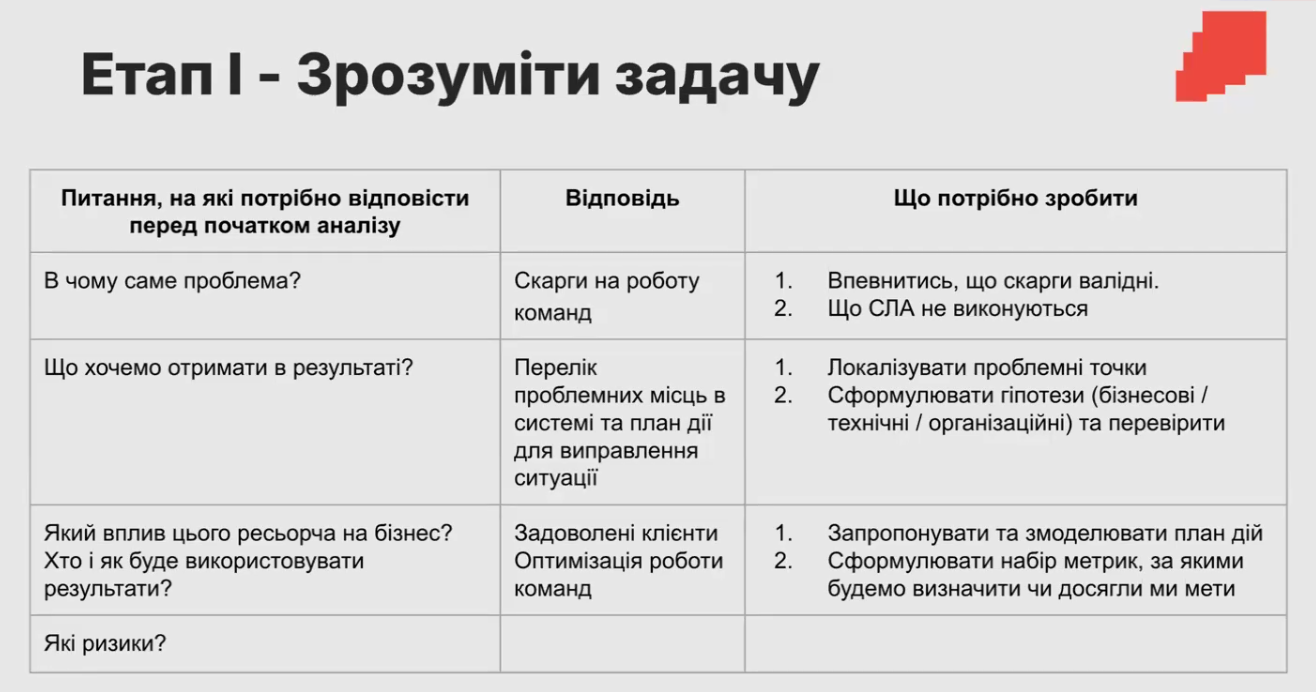

# **EDA - розвідувальний аналіз**

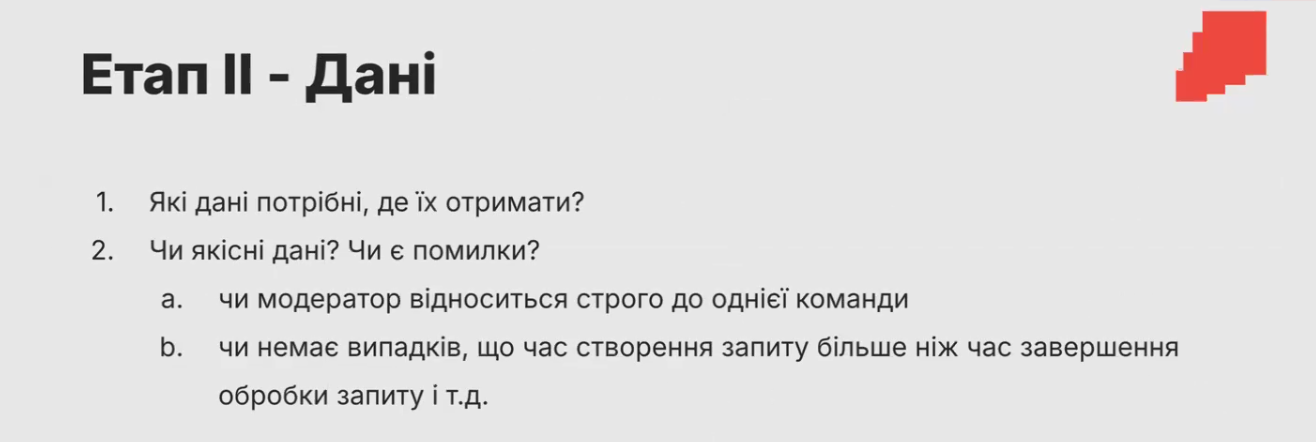

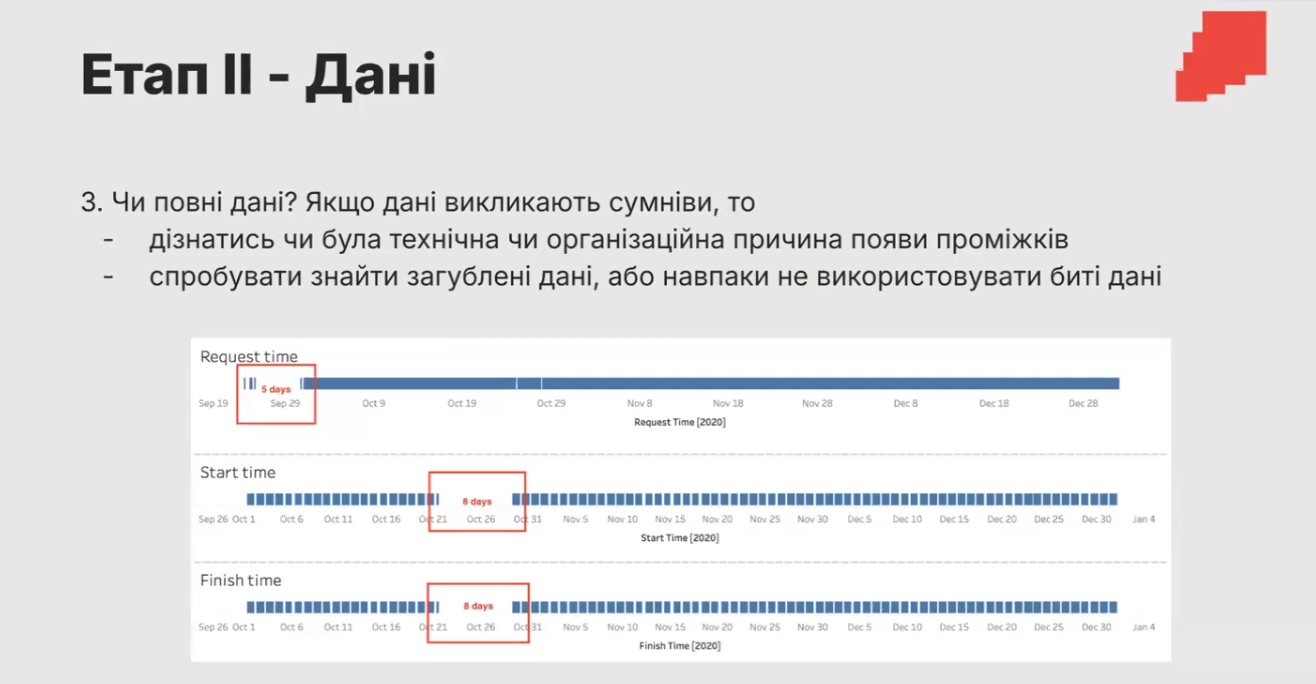

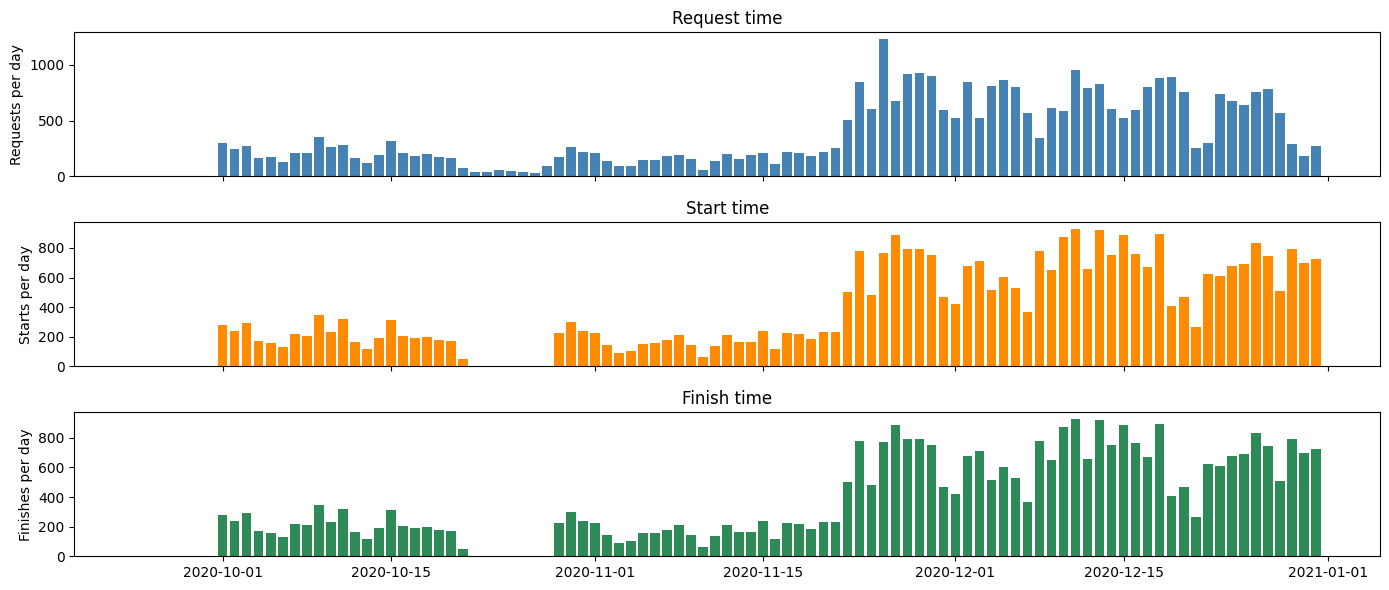

In [4]:
df['request_time'] = pd.to_datetime(df['request_time'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['finish_time'] = pd.to_datetime(df['finish_time'])


# Згрупуємо дати по днях
request_counts = df['request_time'].dt.floor('D').value_counts().sort_index()
start_counts = df['start_time'].dt.floor('D').value_counts().sort_index()
finish_counts = df['finish_time'].dt.floor('D').value_counts().sort_index()

# Побудуємо графіки
fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

axes[0].bar(request_counts.index, request_counts.values, color='steelblue')
axes[0].set_title("Request time")
axes[0].set_ylabel("Requests per day")

axes[1].bar(start_counts.index, start_counts.values, color='darkorange')
axes[1].set_title("Start time")
axes[1].set_ylabel("Starts per day")

axes[2].bar(finish_counts.index, finish_counts.values, color='seagreen')
axes[2].set_title("Finish time")
axes[2].set_ylabel("Finishes per day")

plt.tight_layout()
plt.show()

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Створення підграфіків: 3 рядки, 1 колонка
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=("Request time", "Start time", "Finish time"))

# Додавання графіків
fig.add_trace(go.Bar(x=request_counts.index, y=request_counts.values, name="Request time", marker_color='steelblue'), row=1, col=1)
fig.add_trace(go.Bar(x=start_counts.index, y=start_counts.values, name="Start time", marker_color='orange'), row=2, col=1)
fig.add_trace(go.Bar(x=finish_counts.index, y=finish_counts.values, name="Finish time", marker_color='seagreen'), row=3, col=1)

# Оформлення
fig.update_layout(
    height=700,
    showlegend=False,
    title_text="Розподіл кейсів за днями (Request, Start, Finish)",
    bargap=0.1,
    template='plotly_white'
)

fig.update_xaxes(title_text="Дата", row=3, col=1)
fig.update_yaxes(title_text="Кількість")

fig.show()

In [6]:
import plotly.graph_objects as go
# Створення фігури
fig = go.Figure()

fig.add_trace(go.Bar(
    x=request_counts.index,
    y=request_counts.values,
    name='Request time',
    marker_color='steelblue'
))

fig.add_trace(go.Bar(
    x=start_counts.index,
    y=start_counts.values,
    name='Start time',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    x=finish_counts.index,
    y=finish_counts.values,
    name='Finish time',
    marker_color='seagreen'
))

# Налаштування оформлення
fig.update_layout(
    title='Кількість запитів, стартів і завершень по днях',
    xaxis_title='Дата',
    yaxis_title='Кількість',
    barmode='group',  # або 'overlay', або 'stack'
    bargap=0.1,
    template='plotly_white',
    height=500
)

fig.show()

**Висновок:** перевірити чому не вистачає даних на початку (вересень 2020) та проміжок у жовтні.

Дані з вересня можна не враховувати, їх замало.

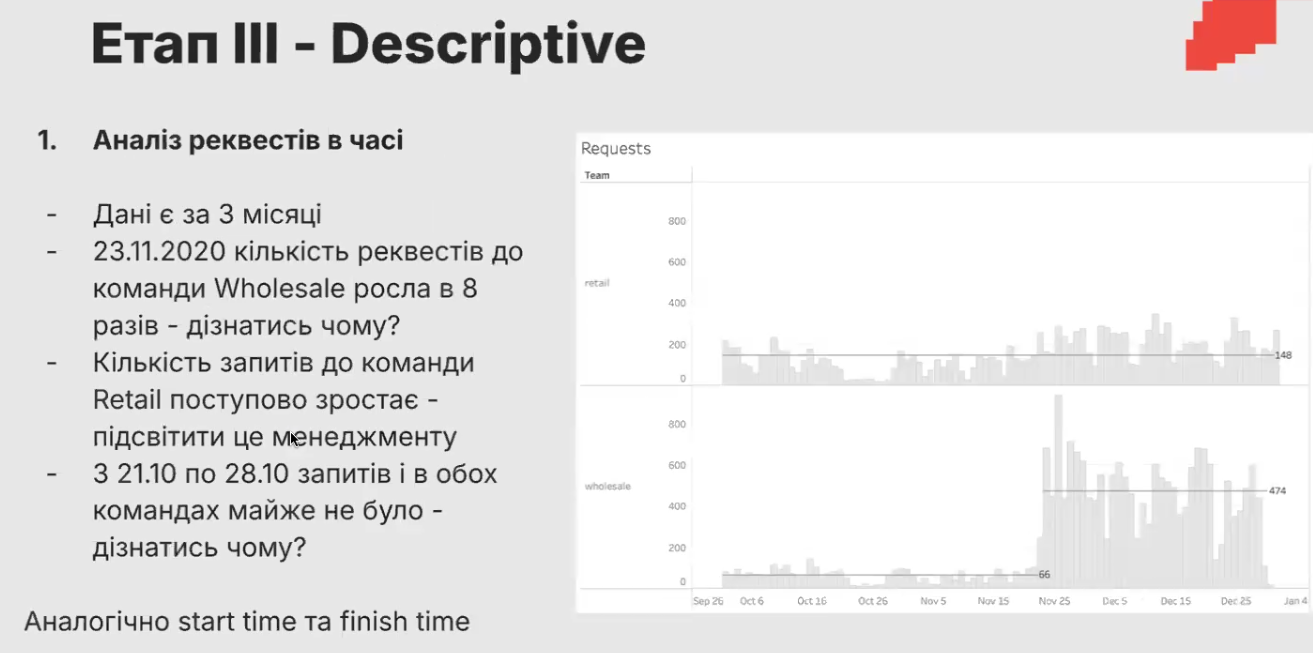

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Перетворення дат
df['request_time'] = pd.to_datetime(df['request_time'])
df['request_day'] = df['request_time'].dt.floor('D')

# Групування
daily_counts = df.groupby(['request_day', 'team']).size().reset_index(name='count')

# Розділення на команди
retail = daily_counts[daily_counts['team'] == 'retail']
wholesale = daily_counts[daily_counts['team'] == 'wholesale']

# Середні значення
retail_mean = retail['count'].mean()
split_date = pd.to_datetime("2020-11-23")
wh_before = wholesale[wholesale['request_day'] < split_date]['count'].mean()
wh_after = wholesale[wholesale['request_day'] >= split_date]['count'].mean()

# Графік
fig = px.bar(daily_counts,
             x='request_day',
             y='count',
             facet_row='team',
             color_discrete_sequence=['#a2a2a2'],
             labels={'request_day': 'Date', 'count': 'Requests'},
             title='Кількість реквестів у часі по командах')

# Ручне додавання горизонтальних ліній через add_shape

# Для Retail (верхній графік = row=1)
fig.add_shape(type='line',
              x0=daily_counts['request_day'].min(),
              x1=daily_counts['request_day'].max(),
              y0=retail_mean,
              y1=retail_mean,
              line=dict(color='black', dash='dot'),
              xref='x1', yref='y1')

# Для Wholesale: до 23.11
fig.add_shape(type='line',
              x0=daily_counts['request_day'].min(),
              x1=split_date,
              y0=wh_before,
              y1=wh_before,
              line=dict(color='red', dash='dash'),
              xref='x2', yref='y2')

# Для Wholesale: після 23.11
fig.add_shape(type='line',
              x0=split_date,
              x1=daily_counts['request_day'].max(),
              y0=wh_after,
              y1=wh_after,
              line=dict(color='green', dash='dash'),
              xref='x2', yref='y2')

# Підписи до ліній можна додати через анотації
fig.add_annotation(text=f"Avg retail: {retail_mean:.1f}",
                   x=daily_counts['request_day'].min(),
                   y=retail_mean,
                   showarrow=False,
                   font=dict(color='black'),
                   xref='x1', yref='y1',
                   yshift=10)

fig.add_annotation(text=f"Before 23.11: {wh_before:.1f}",
                   x=daily_counts['request_day'].min(),
                   y=wh_before,
                   showarrow=False,
                   font=dict(color='red'),
                   xref='x2', yref='y2',
                   yshift=10)

fig.add_annotation(text=f"After 23.11: {wh_after:.1f}",
                   x=split_date,
                   y=wh_after,
                   showarrow=False,
                   font=dict(color='green'),
                   xref='x2', yref='y2',
                   yshift=10)

# Фінальне оформлення
fig.update_layout(height=600, template='simple_white', showlegend=False)
fig.update_yaxes(matches=None)

fig.show()


In [8]:
# Переконайтесь, що start_time у форматі datetime
df['start_day'] = pd.to_datetime(df['start_time'])

# Округлюємо до днів
df['start_day'] = df['start_day'].dt.floor('D')

# Групуємо: кількість запитів по днях і по команді
start_counts = df.groupby(['start_day', 'team']).size().reset_index(name='count')

# Створення графіку
fig = px.bar(start_counts,
             x='start_day',
             y='count',
             facet_row='team',
             height=600,
             color_discrete_sequence=['#a2a2a2'],
             labels={'start_day': 'Date', 'count': 'Requests'},
             title='Кількість start_day у часі по командах')

# Мінімалістичний стиль
fig.update_layout(showlegend=False, template='simple_white')

# Упорядкування осей
fig.update_yaxes(matches=None)  # дозволяє окремі масштаби для кожної команди

fig.show()

In [9]:
# Переконайтесь, що start_time у форматі datetime
df['finish_day'] = pd.to_datetime(df['finish_time'])

# Округлюємо до днів
df['finish_day'] = df['finish_day'].dt.floor('D')

# Групуємо: кількість запитів по днях і по команді
finish_counts = df.groupby(['finish_day', 'team']).size().reset_index(name='count')

# Створення графіку
fig = px.bar(finish_counts,
             x='finish_day',
             y='count',
             facet_row='team',
             height=600,
             color_discrete_sequence=['#a2a2a2'],
             labels={'finish_day': 'Date', 'count': 'Requests'},
             title='Кількість finish_day у часі по командах')

# Мінімалістичний стиль
fig.update_layout(showlegend=False, template='simple_white')

# Упорядкування осей
fig.update_yaxes(matches=None)  # дозволяє окремі масштаби для кожної команди

fig.show()

**Висновки:** для команди  wholesale в період з 23 листопада кількість запитів зростає майже в 8 разів. Потрібно поцікавитися чому так трапилося, а також розглядати дані для цієї команди починаючи з 23.11 і всі припщення будувати на цих даних.

Проміжок, де немає даних потрібно підсвітити і звернутися до менеджменту за інформацією про події, які відбувалися в той момент.

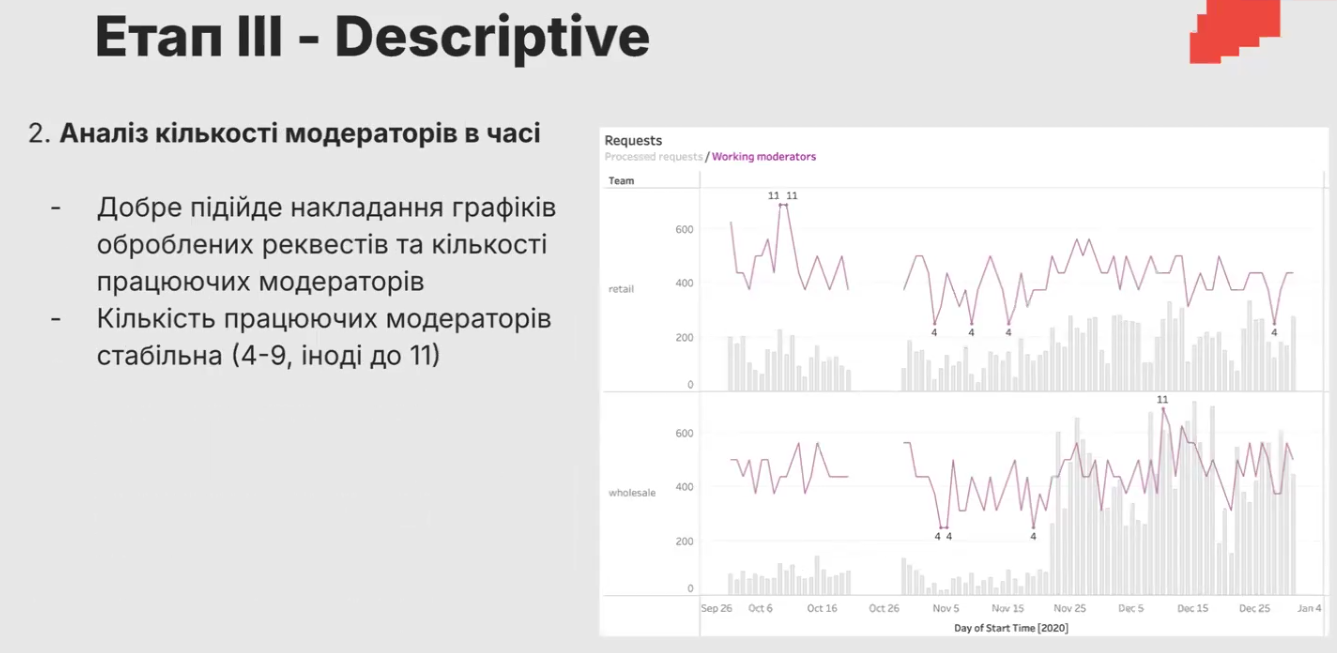

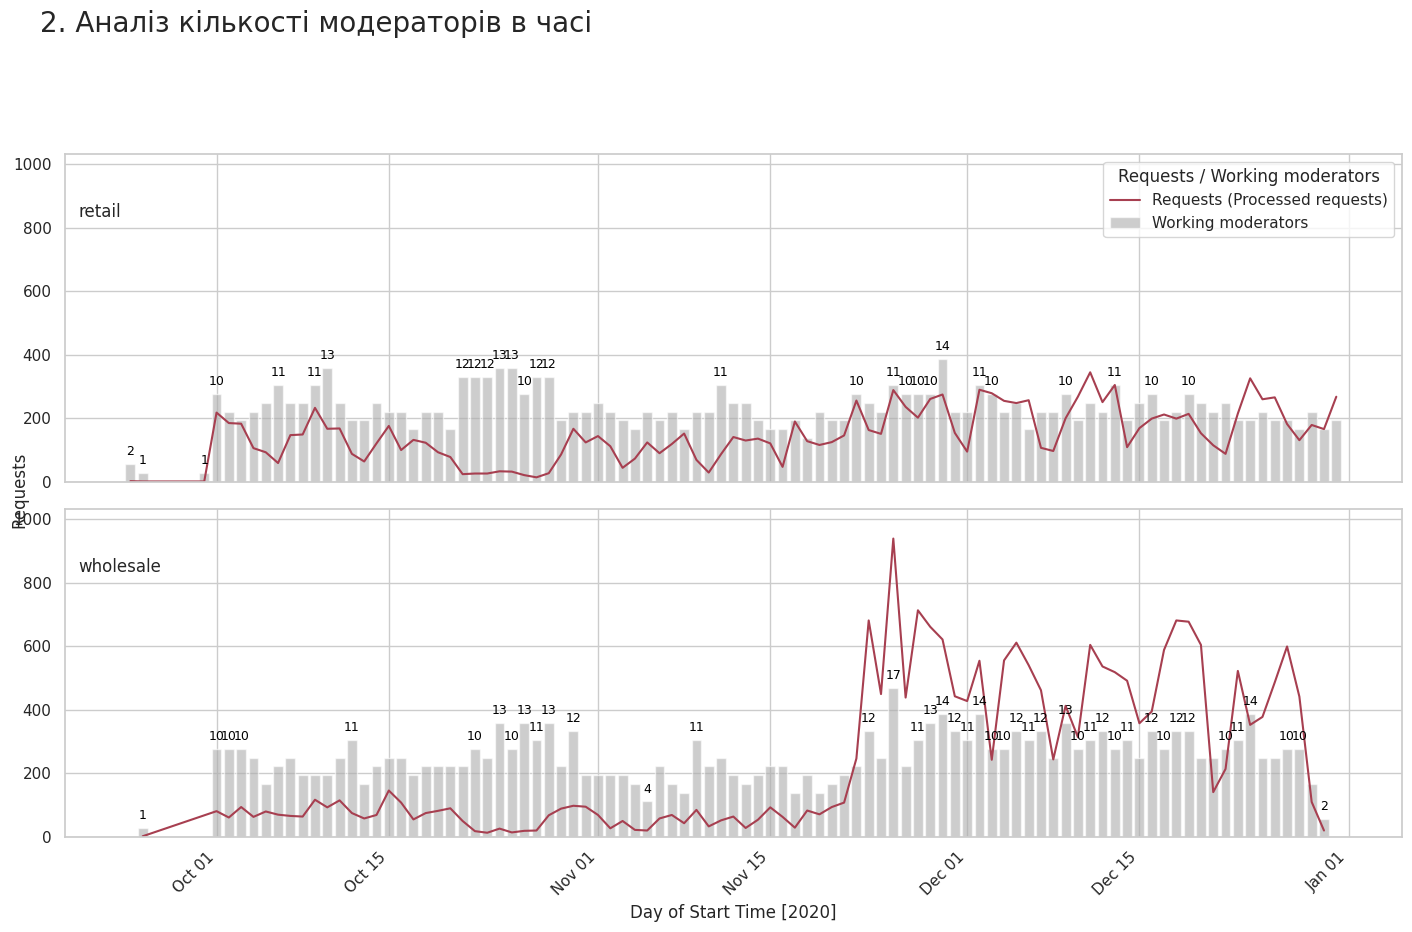

In [10]:
import pandas as pd
import numpy as np # Потрібен для деяких математичних операцій, якщо знадобиться
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# --- 1. Агрегація даних (обчислення кількості запитів та модераторів за день) ---
# Оброблені запити: рахуємо кількість id_request за request_day та team
processed_requests_daily = df.groupby(['request_day', 'team'])['id_request'].count().reset_index()
processed_requests_daily.rename(columns={'id_request': 'Processed requests'}, inplace=True)

# Працюючі модератори: рахуємо кількість УНІКАЛЬНИХ модераторів за request_day та team
# Використовуємо 'request_day' як день, що відповідає "Day of Start Time" на графіку
working_moderators_daily = df.groupby(['request_day', 'team'])['moderator'].nunique().reset_index()
working_moderators_daily.rename(columns={'moderator': 'Working moderators'}, inplace=True)

# Об'єднуємо агреговані дані
# Зауваження: використовуємо request_day, якщо це відповідає 'Day of Start Time'
# Якщо у вас є інша колонка для 'Day of Start Time', використовуйте її.
merged_data = pd.merge(processed_requests_daily, working_moderators_daily, on=['request_day', 'team'], how='outer')
merged_data.rename(columns={'request_day': 'Day of Start Time'}, inplace=True)


# --- 2. Побудова графіків ---

# Налаштування стилю Seaborn
sns.set_theme(style="whitegrid")

# Створення фігури та осей (2 рядки, 1 стовпець)
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Визначення кольорів
color_requests = '#A73F50' # Темно-червоний / бордовий
color_moderators = '#ADADAD' # Сірий

# --- Графік для 'retail' ---
ax0 = axes[0]
df_retail_plot = merged_data[merged_data['team'] == 'retail']

# Лінійний графік для Processed requests
sns.lineplot(
    data=df_retail_plot,
    x='Day of Start Time',
    y='Processed requests',
    ax=ax0,
    color=color_requests,
    label='Requests (Processed requests)'
)

# Гістограма для Working moderators
# Масштабуємо модераторів для видимості. Коефіцієнт '60' - це приблизна кількість запитів на одного модератора
# Вам потрібно буде підібрати цей коефіцієнт (або максимальне значення Request / максимальне значення Moderator)
# залежно від фактичних діапазонів ваших даних.
max_requests = merged_data['Processed requests'].max()
max_moderators = merged_data['Working moderators'].max()
scaling_factor = max_requests / max_moderators / 2 # Приблизно вдвічі менше за максимальні реквести

ax0.bar(
    df_retail_plot['Day of Start Time'],
    df_retail_plot['Working moderators'] * scaling_factor,
    color=color_moderators,
    alpha=0.6,
    width=0.8,
    label='Working moderators'
)

# Анотації для Working moderators (як на зразку)
for index, row in df_retail_plot.iterrows():
    # Анотуємо лише ті значення, які є піками (наприклад, >=10) або низькими (<=4), як на графіку
    if row['Working moderators'] >= 10 or row['Working moderators'] <= 4:
        ax0.text(
            row['Day of Start Time'],
            (row['Working moderators'] * scaling_factor) + (max_requests * 0.02), # Трохи вище стовпця
            f"{row['Working moderators']}",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9
        )

ax0.set_title('')
ax0.set_ylabel('') # Загальний Y-лейбл буде в кінці
ax0.set_xlabel('')
ax0.set_ylim(0, max_requests * 1.1) # Фіксуємо діапазон Y для обох графіків, з невеликим запасом

# Легенда
handles, labels = ax0.get_legend_handles_labels()
order = [labels.index('Requests (Processed requests)'), labels.index('Working moderators')]
ax0.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', title='Requests / Working moderators')

# Мітка команди
ax0.text(0.01, 0.85, 'retail', transform=ax0.transAxes, fontsize=12, va='top', ha='left')


# --- Графік для 'wholesale' ---
ax1 = axes[1]
df_wholesale_plot = merged_data[merged_data['team'] == 'wholesale']

# Лінійний графік для Processed requests
sns.lineplot(
    data=df_wholesale_plot,
    x='Day of Start Time',
    y='Processed requests',
    ax=ax1,
    color=color_requests
)

# Гістограма для Working moderators
ax1.bar(
    df_wholesale_plot['Day of Start Time'],
    df_wholesale_plot['Working moderators'] * scaling_factor,
    color=color_moderators,
    alpha=0.6,
    width=0.8
)

# Анотації для Working moderators
for index, row in df_wholesale_plot.iterrows():
    if row['Working moderators'] >= 10 or row['Working moderators'] <= 4:
        ax1.text(
            row['Day of Start Time'],
            (row['Working moderators'] * scaling_factor) + (max_requests * 0.02),
            f"{row['Working moderators']}",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9
        )

ax1.set_title('')
ax1.set_ylabel('')
ax1.set_xlabel('Day of Start Time [2020]')
ax1.set_ylim(0, max_requests * 1.1)

# Мітка команди
ax1.text(0.01, 0.85, 'wholesale', transform=ax1.transAxes, fontsize=12, va='top', ha='left')


# --- Загальні налаштування фігури ---
fig.suptitle('2. Аналіз кількості модераторів в часі', fontsize=20, ha='left', x=0.08, y=0.98)
fig.text(0.06, 0.5, 'Requests', va='center', rotation='vertical', fontsize=12) # Загальний Y-лейбл

# Налаштування формату дати на осі X (для обох графіків, оскільки sharex=True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout(rect=[0.05, 0.05, 1, 0.9]) # Регулювання відступів
plt.show()

**Висновки:**
Для гуртової команди з 23.11 кількість запитів зросла, а кількість модераторів майже не змінилася. Мій графік дуже відрізняється від оригіналу(цікаво чому?)

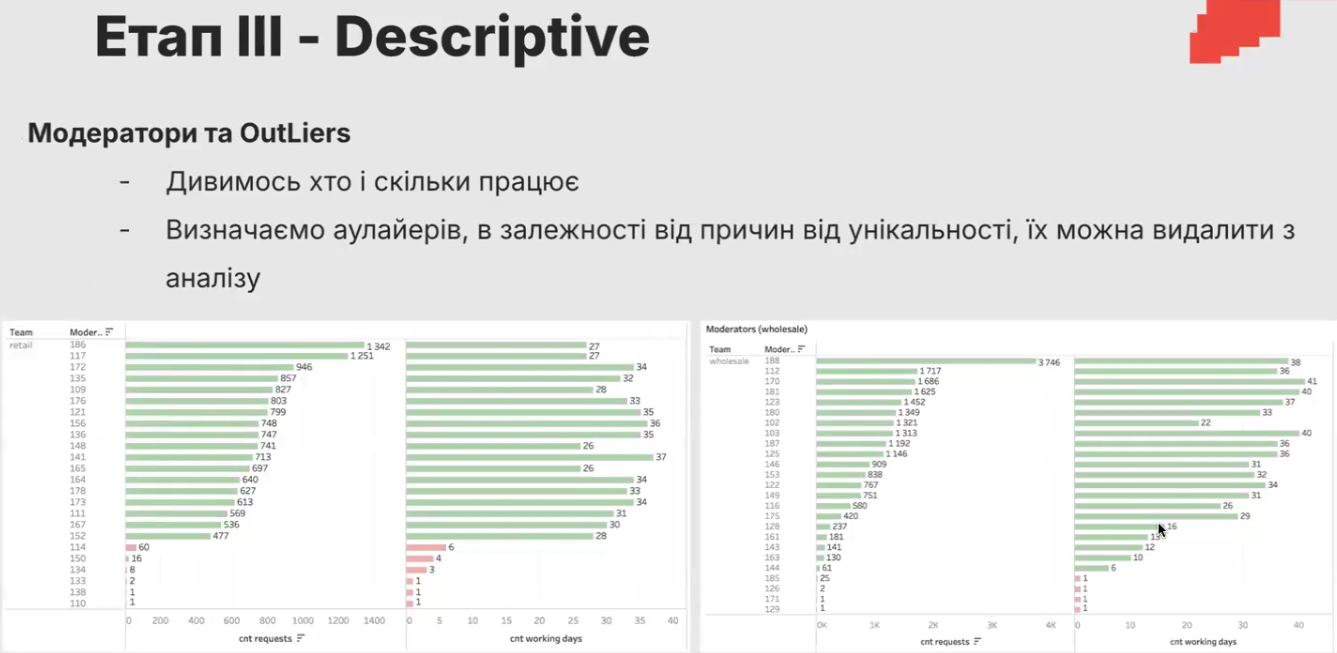

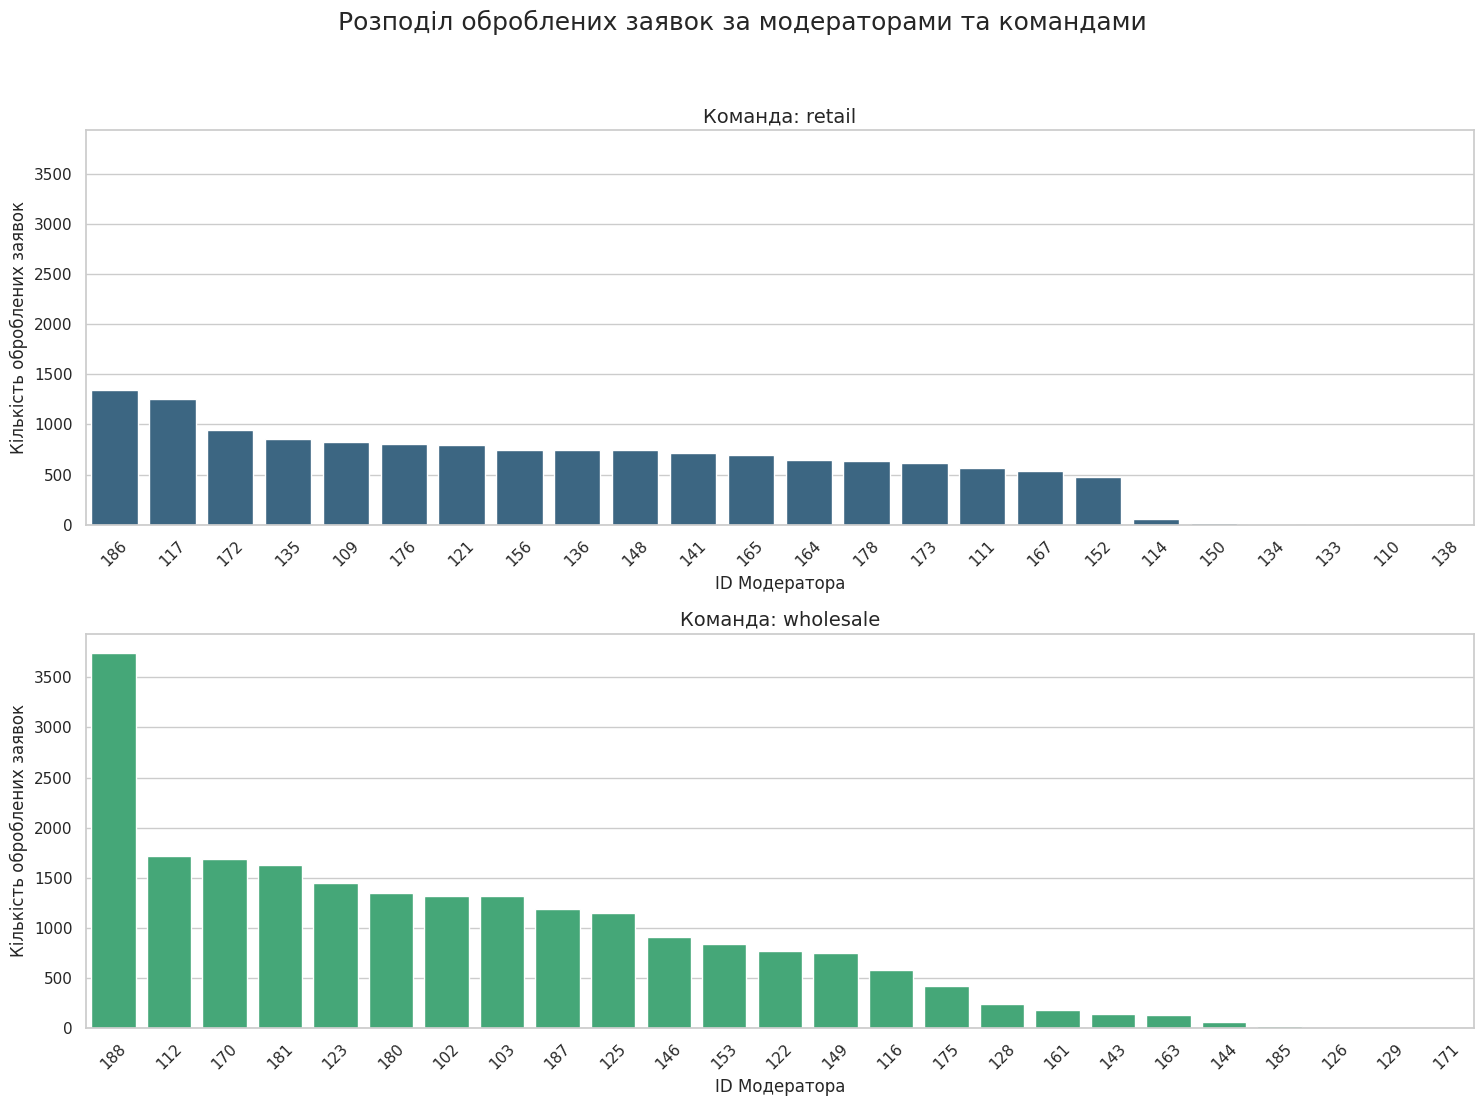

In [11]:
# --- 1. Агрегація даних: Кількість оброблених заявок кожним модератором за командою ---
moderator_performance = df.groupby(['team', 'moderator'])['id_request'].count().reset_index()
moderator_performance.rename(columns={'id_request': 'Processed_Requests'}, inplace=True)

# --- 2. Побудова гістограм ---

# Налаштування стилю Seaborn
sns.set_theme(style="whitegrid")

# Створення фігури та осей (2 рядки, 1 стовпець)
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=False, sharey=True)

# Заголовок
fig.suptitle('Розподіл оброблених заявок за модераторами та командами', fontsize=18, y=0.95)

# Кольори для гістограм
retail_color = sns.color_palette("viridis", 2)[0]
wholesale_color = sns.color_palette("viridis", 2)[1]

# --- Гістограма для 'retail' ---
ax0 = axes[0]
df_retail_moderators = moderator_performance[moderator_performance['team'] == 'retail'].copy() # .copy() щоб уникнути SettingWithCopyWarning
# Важливо: сортуємо тільки для retail, щоб отримати порядок для цієї команди
df_retail_moderators_sorted = df_retail_moderators.sort_values(by='Processed_Requests', ascending=False)
# Отримуємо порядок модераторів для осі X
retail_order = df_retail_moderators_sorted['moderator'].tolist()

sns.barplot(
    data=df_retail_moderators_sorted, # Передаємо вже відсортований DataFrame
    x='moderator',
    y='Processed_Requests',
    ax=ax0,
    color=retail_color,
    order=retail_order # Вказуємо порядок стовпців
)
ax0.set_title('Команда: retail', fontsize=14)
ax0.set_xlabel('ID Модератора')
ax0.set_ylabel('Кількість оброблених заявок')
ax0.tick_params(axis='x', rotation=45)

# --- Гістограма для 'wholesale' ---
ax1 = axes[1]
df_wholesale_moderators = moderator_performance[moderator_performance['team'] == 'wholesale'].copy() # .copy()
# Важливо: сортуємо тільки для wholesale, щоб отримати порядок для цієї команди
df_wholesale_moderators_sorted = df_wholesale_moderators.sort_values(by='Processed_Requests', ascending=False)
# Отримуємо порядок модераторів для осі X
wholesale_order = df_wholesale_moderators_sorted['moderator'].tolist()

sns.barplot(
    data=df_wholesale_moderators_sorted, # Передаємо вже відсортований DataFrame
    x='moderator',
    y='Processed_Requests',
    ax=ax1,
    color=wholesale_color,
    order=wholesale_order # Вказуємо порядок стовпців
)
ax1.set_title('Команда: wholesale', fontsize=14)
ax1.set_xlabel('ID Модератора')
ax1.set_ylabel('Кількість оброблених заявок')
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

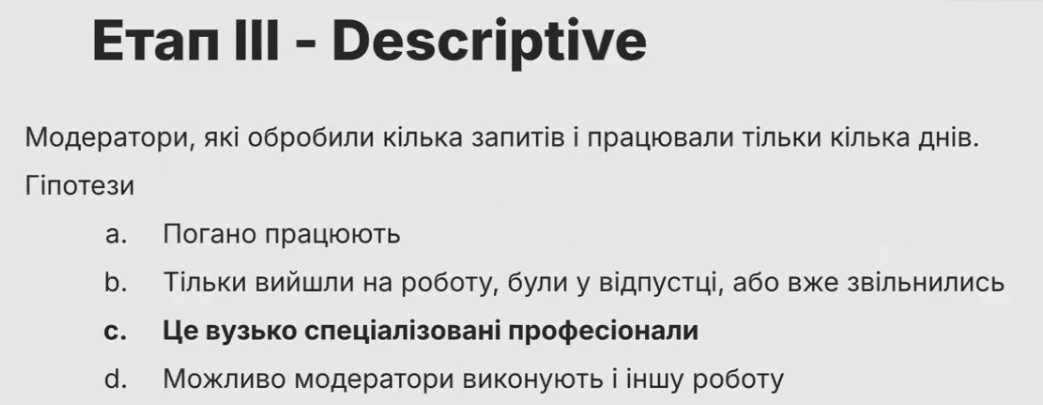

**Висновки**: таких модераторів з аналізу варто викреслювати. Це викиди, які не впливають на загальну картину, але вони впливають на кількість модераторів, що може спотворити остаточні висновки.

# **Main Analysis**

Перше, що ми робимо - дізнаємося чи є взагалі проблема. Чи дійсно скарги які поступають вони валідні.

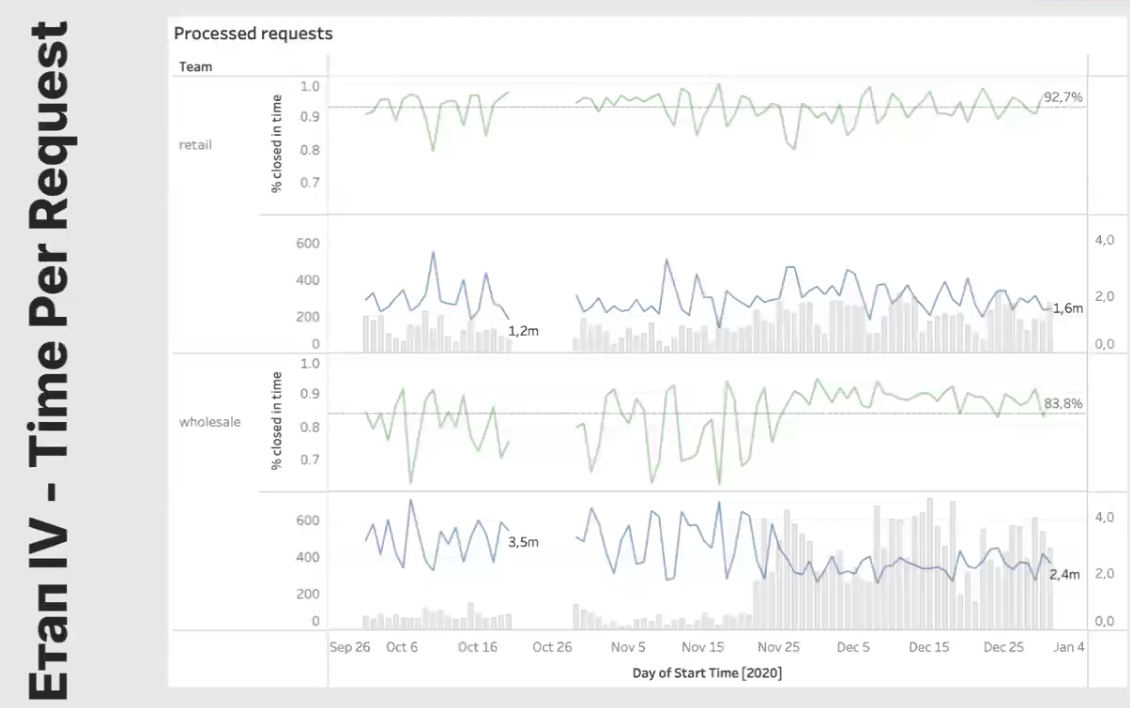

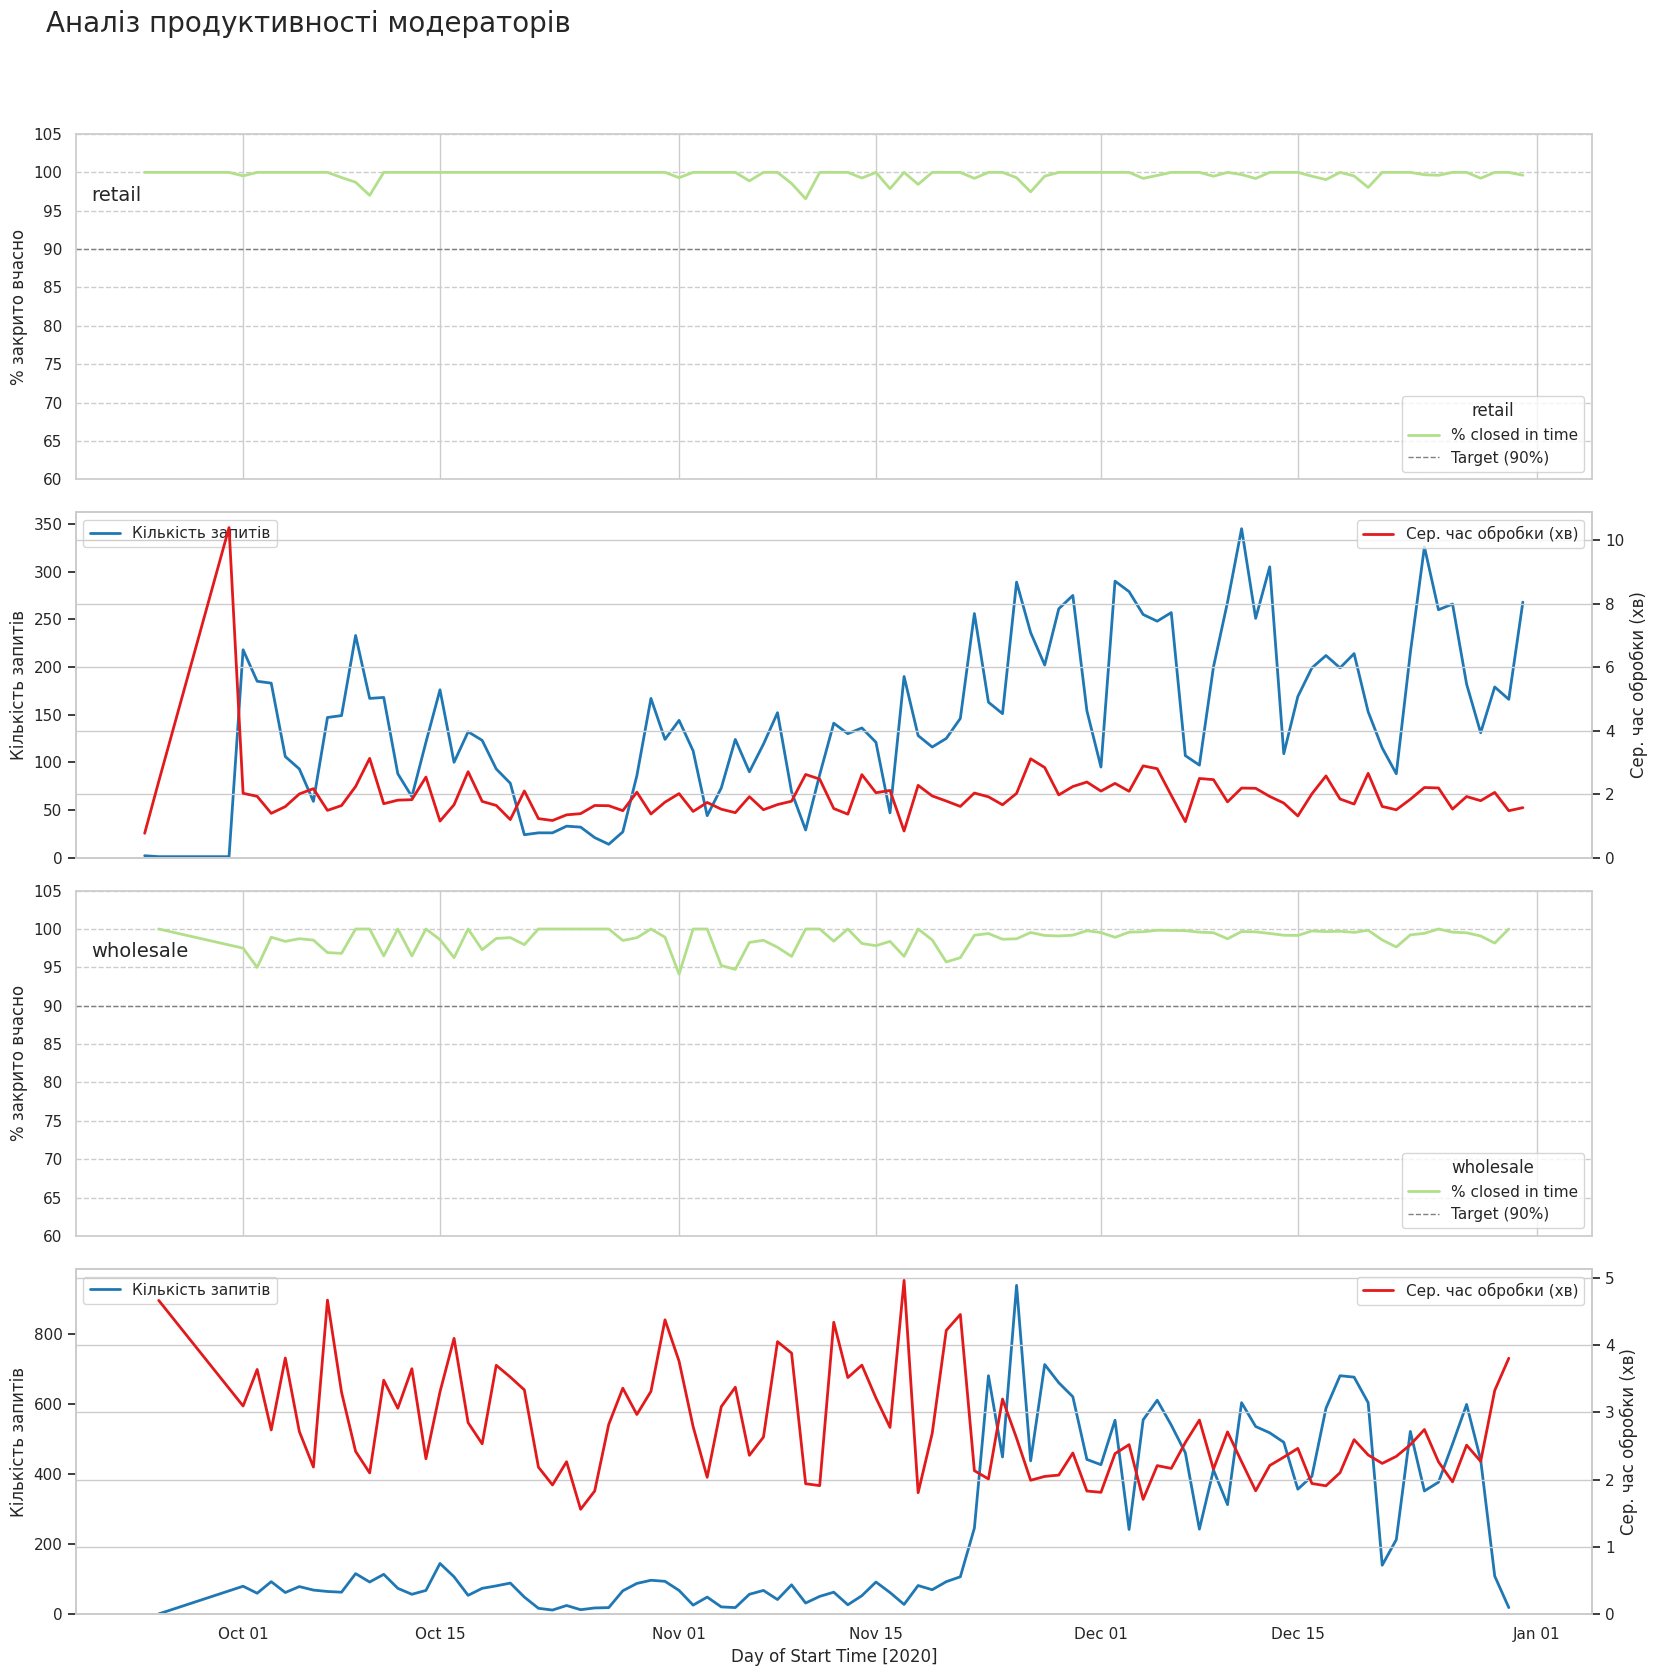

In [12]:
# --- 1. Розрахунки нових показників ---

# Час обробки запиту в хвилинах
df['processing_time_minutes'] = (df['finish_time'] - df['start_time']).dt.total_seconds() / 60

# Визначення порогу "закритий вчасно" (наприклад, до 15 хвилин)
ON_TIME_THRESHOLD_MINUTES = 15
df['is_on_time'] = (df['processing_time_minutes'] <= ON_TIME_THRESHOLD_MINUTES).astype(int) # 1 if on time, 0 otherwise

# Агрегація даних по днях для кожної команди
daily_metrics = df.groupby(['request_day', 'team']).agg(
    # Відсоток запитів, закритих вчасно
    on_time_percentage=('is_on_time', lambda x: x.mean() * 100), # .mean() для 0/1 дає відсоток
    # Кількість оброблених запитів
    processed_requests=('id_request', 'count'),
    # Середній час обробки запиту
    avg_processing_time=('processing_time_minutes', 'mean')
).reset_index()

# Перейменуємо 'request_day' для зручності візуалізації
daily_metrics.rename(columns={'request_day': 'Day of Start Time'}, inplace=True)


# --- 2. Побудова графіків ---

# Налаштування стилю Seaborn
sns.set_theme(style="whitegrid")

# Визначення "веселіших" кольорів (наприклад, з палітри 'viridis' або 'Paired')
# 'Paired' палітра має хороші контрастні кольори
colors = sns.color_palette("Paired", 6)
color_ontime = colors[2] # Greenish
color_requests = colors[1] # Blue
color_avg_time = colors[5] # Orange

# Створення фігури та осей (4 рядки, 1 стовпець)
# Збільшуємо figsize, щоб уникнути попередження tight_layout
fig, axes = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

# Загальний заголовок
fig.suptitle('Аналіз продуктивності модераторів', fontsize=20, ha='left', x=0.08, y=0.98)

# --- Графіки для 'retail' ---
df_retail_daily = daily_metrics[daily_metrics['team'] == 'retail']

# --- retail: % закритих вчасно ---
ax0 = axes[0]
sns.lineplot(
    data=df_retail_daily,
    x='Day of Start Time',
    y='on_time_percentage',
    ax=ax0,
    color=color_ontime,
    linewidth=2,
    label='% closed in time'
)
ax0.set_title('') # Заголовок команди буде як текст
ax0.set_ylabel('% закрито вчасно')
ax0.set_ylim(60, 105) # Від 60% до 105%
ax0.axhline(90, color='gray', linestyle='--', linewidth=1, label='Target (90%)') # Пунктирна лінія 90%
ax0.legend(loc='lower right', title='retail')
ax0.grid(axis='y', linestyle='--')
ax0.text(0.01, 0.85, 'retail', transform=ax0.transAxes, fontsize=14, va='top', ha='left') # Мітка команди


# --- retail: Кількість запитів та середній час обробки ---
ax1 = axes[1]
sns.lineplot(
    data=df_retail_daily,
    x='Day of Start Time',
    y='processed_requests',
    ax=ax1,
    color=color_requests,
    linewidth=2,
    label='Кількість запитів'
)
ax1.set_ylabel('Кількість запитів')
ax1.set_ylim(bottom=0)
ax1.legend(loc='upper left')

# Створення другої осі Y для середнього часу обробки
ax1_twin = ax1.twinx()
sns.lineplot(
    data=df_retail_daily,
    x='Day of Start Time',
    y='avg_processing_time',
    ax=ax1_twin,
    color=color_avg_time,
    linewidth=2,
    label='Сер. час обробки (хв)'
)
ax1_twin.set_ylabel('Сер. час обробки (хв)')
ax1_twin.set_ylim(bottom=0)
ax1_twin.legend(loc='upper right')
ax1.grid(False) # Відключаємо сітку для лівої осі, щоб уникнути подвоєння


# --- Графіки для 'wholesale' ---
df_wholesale_daily = daily_metrics[daily_metrics['team'] == 'wholesale']

# --- wholesale: % закритих вчасно ---
ax2 = axes[2]
sns.lineplot(
    data=df_wholesale_daily,
    x='Day of Start Time',
    y='on_time_percentage',
    ax=ax2,
    color=color_ontime,
    linewidth=2,
    label='% closed in time'
)
ax2.set_ylabel('% закрито вчасно')
ax2.set_ylim(60, 105)
ax2.axhline(90, color='gray', linestyle='--', linewidth=1, label='Target (90%)')
ax2.legend(loc='lower right', title='wholesale')
ax2.grid(axis='y', linestyle='--')
ax2.text(0.01, 0.85, 'wholesale', transform=ax2.transAxes, fontsize=14, va='top', ha='left') # Мітка команди


# --- wholesale: Кількість запитів та середній час обробки ---
ax3 = axes[3]
sns.lineplot(
    data=df_wholesale_daily,
    x='Day of Start Time',
    y='processed_requests',
    ax=ax3,
    color=color_requests,
    linewidth=2,
    label='Кількість запитів'
)
ax3.set_ylabel('Кількість запитів')
ax3.set_ylim(bottom=0)
ax3.legend(loc='upper left')

# Створення другої осі Y для середнього часу обробки
ax3_twin = ax3.twinx()
sns.lineplot(
    data=df_wholesale_daily,
    x='Day of Start Time',
    y='avg_processing_time',
    ax=ax3_twin,
    color=color_avg_time,
    linewidth=2,
    label='Сер. час обробки (хв)'
)
ax3_twin.set_ylabel('Сер. час обробки (хв)')
ax3_twin.set_ylim(bottom=0)
ax3_twin.legend(loc='upper right')
ax3.grid(False) # Відключаємо сітку для лівої осі

# Налаштування формату дати на осі X (для всіх графіків, оскільки sharex=True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45, ha='right')
ax3.set_xlabel('Day of Start Time [2020]')


plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.95]) # Регулювання відступів для загального заголовка
plt.show()

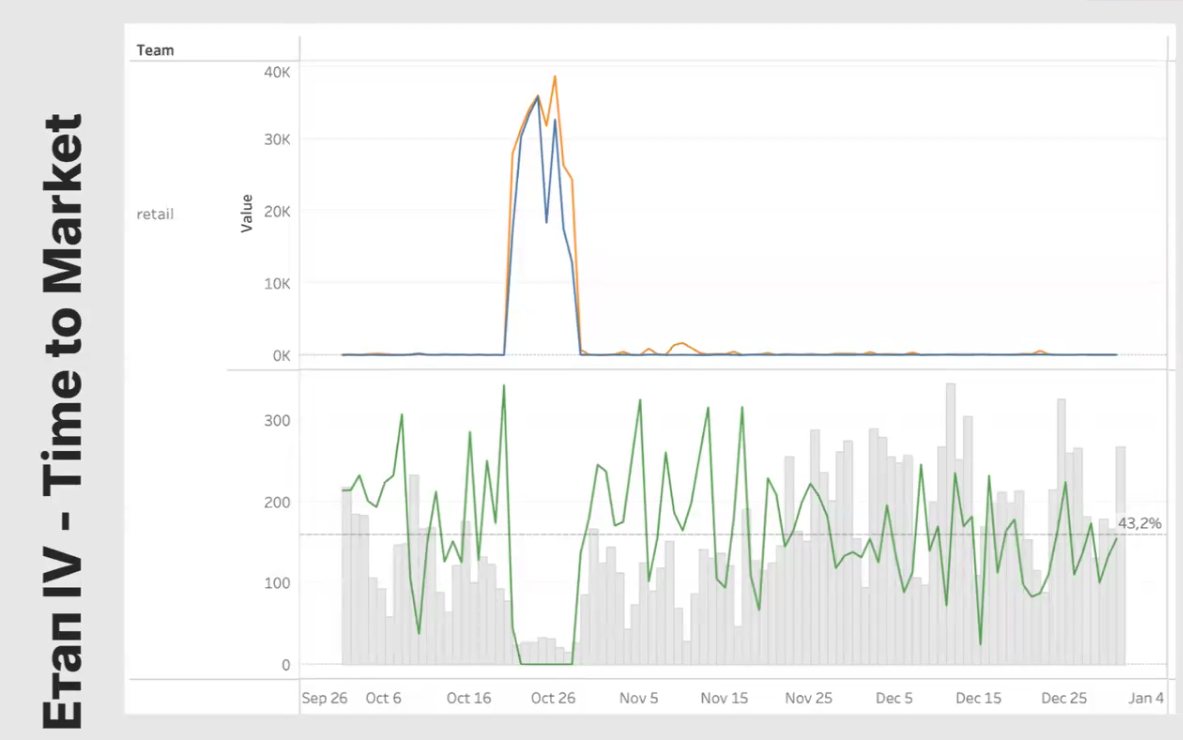

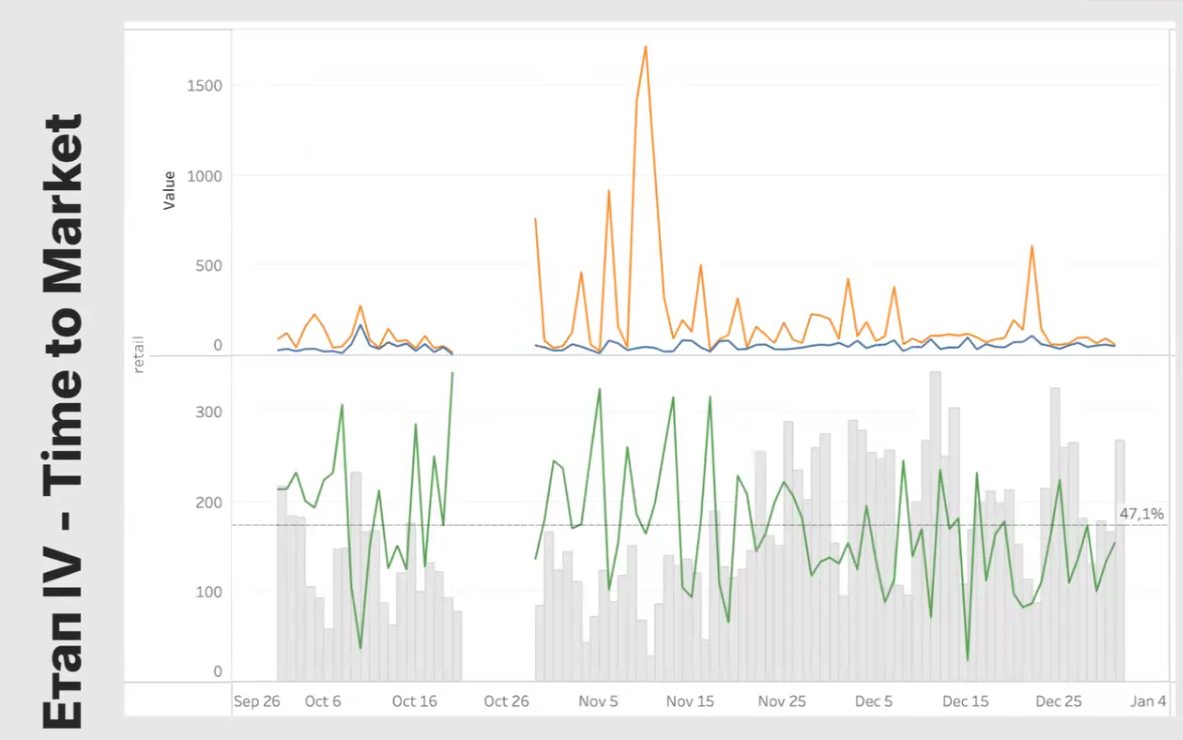

В даному випадку є сенс рахувати медіану(помаранчевий колір - середнє, синій - медіана)

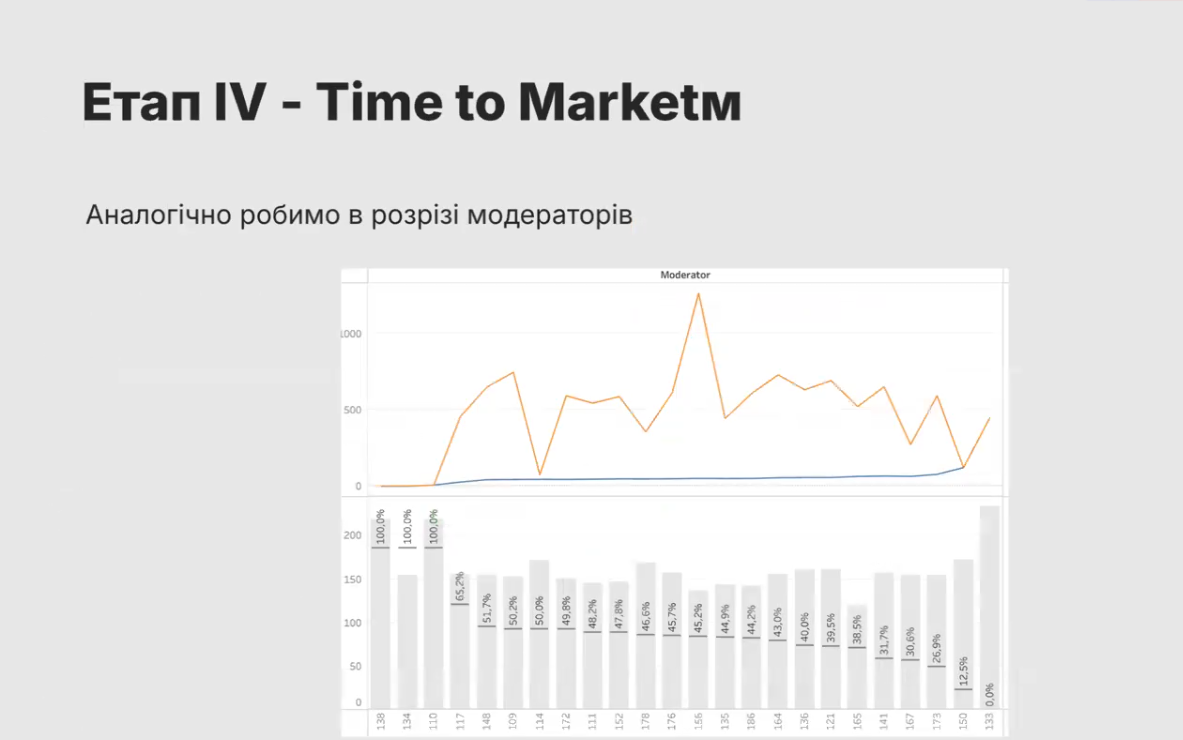

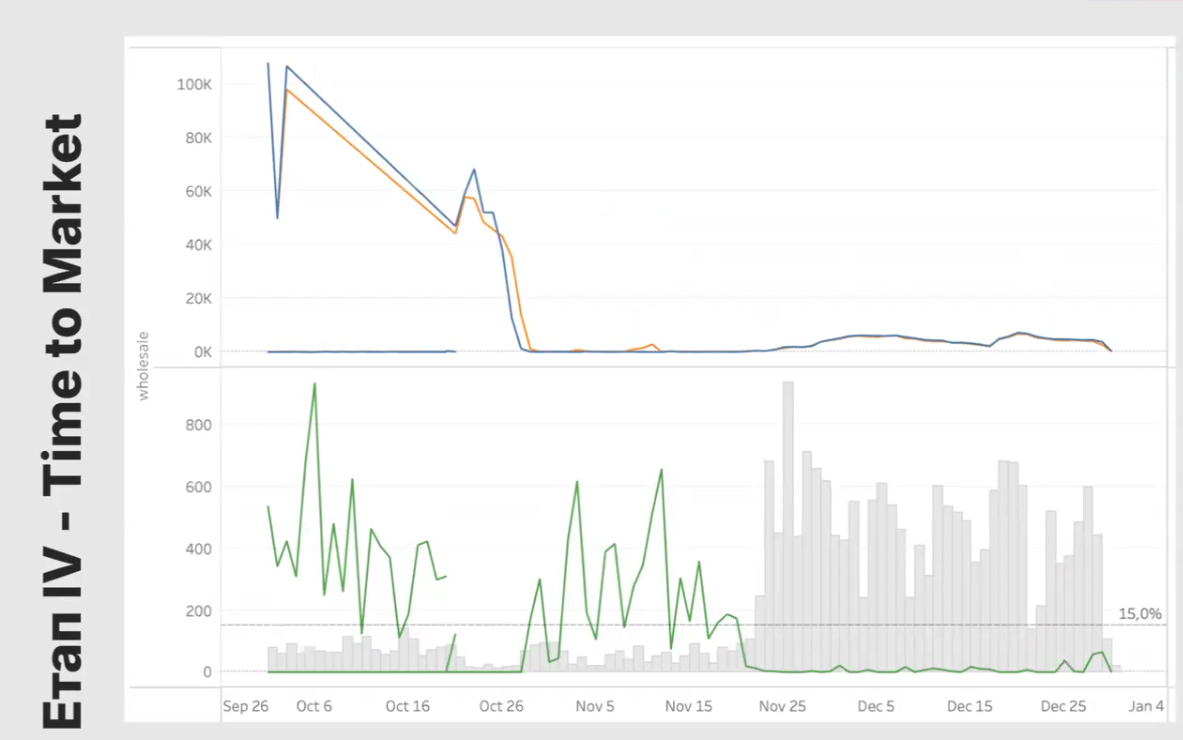

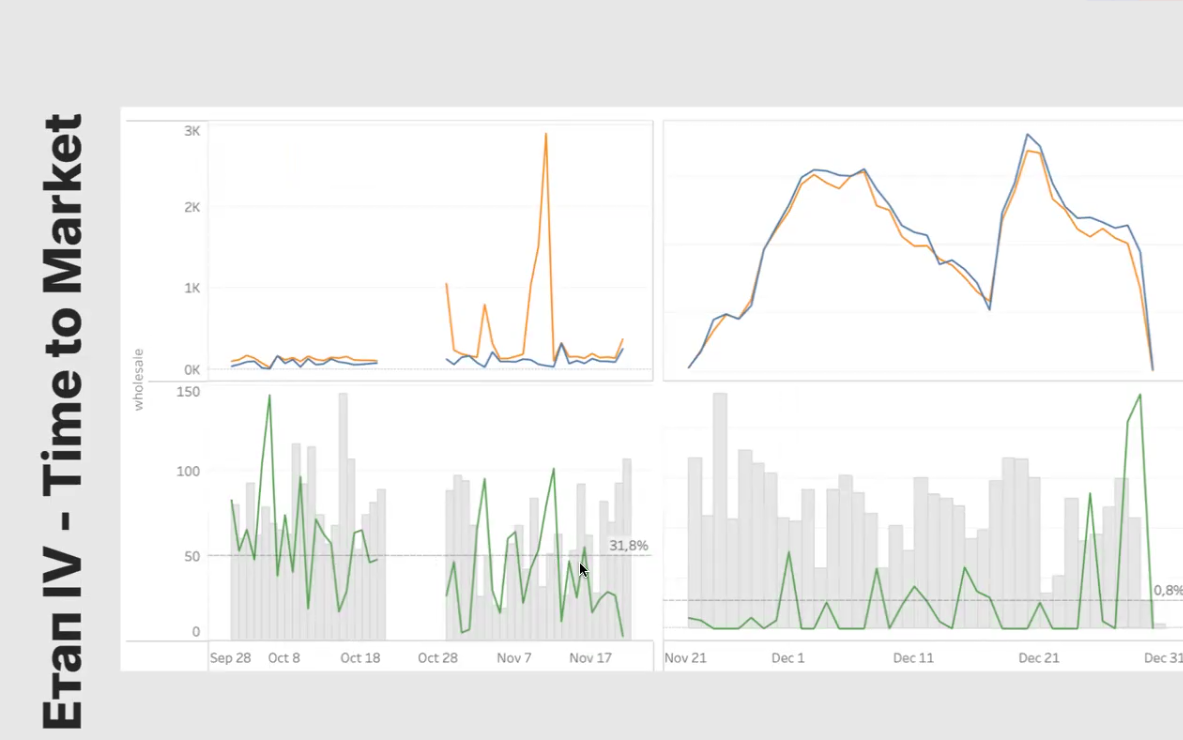

Для гуртової команди варто розглядати проміжки окремо.

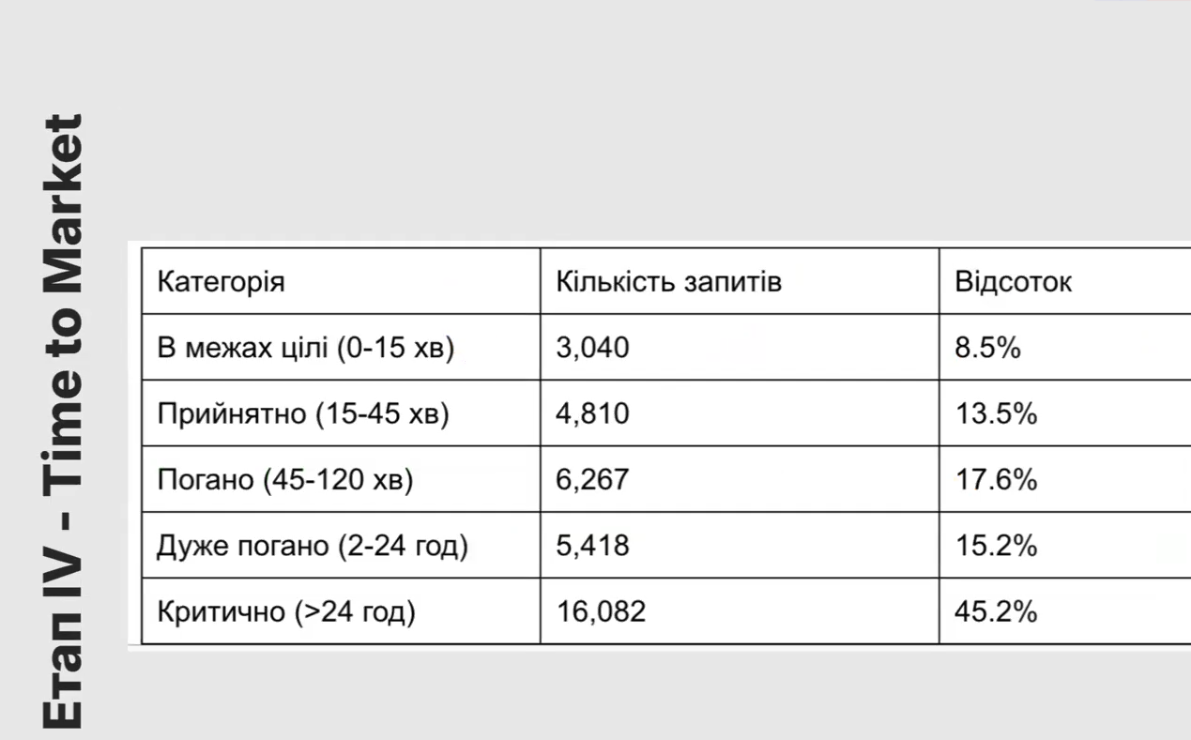

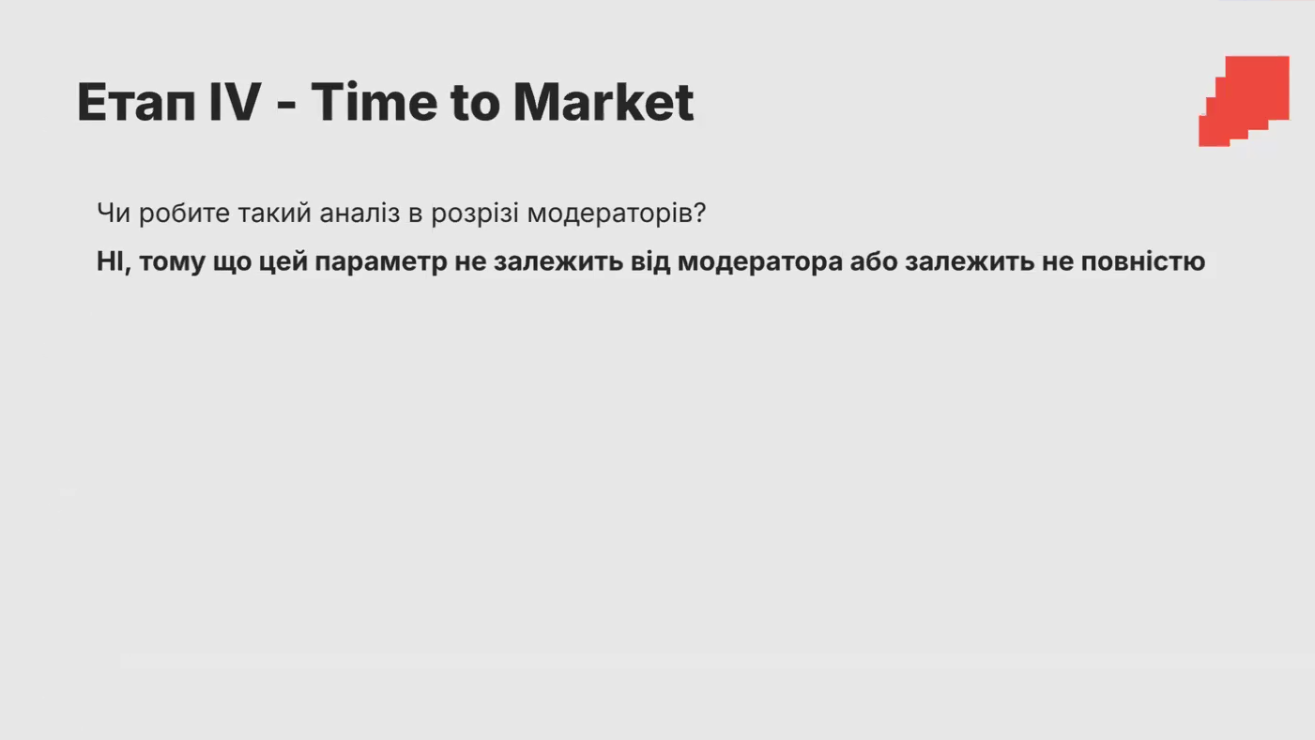

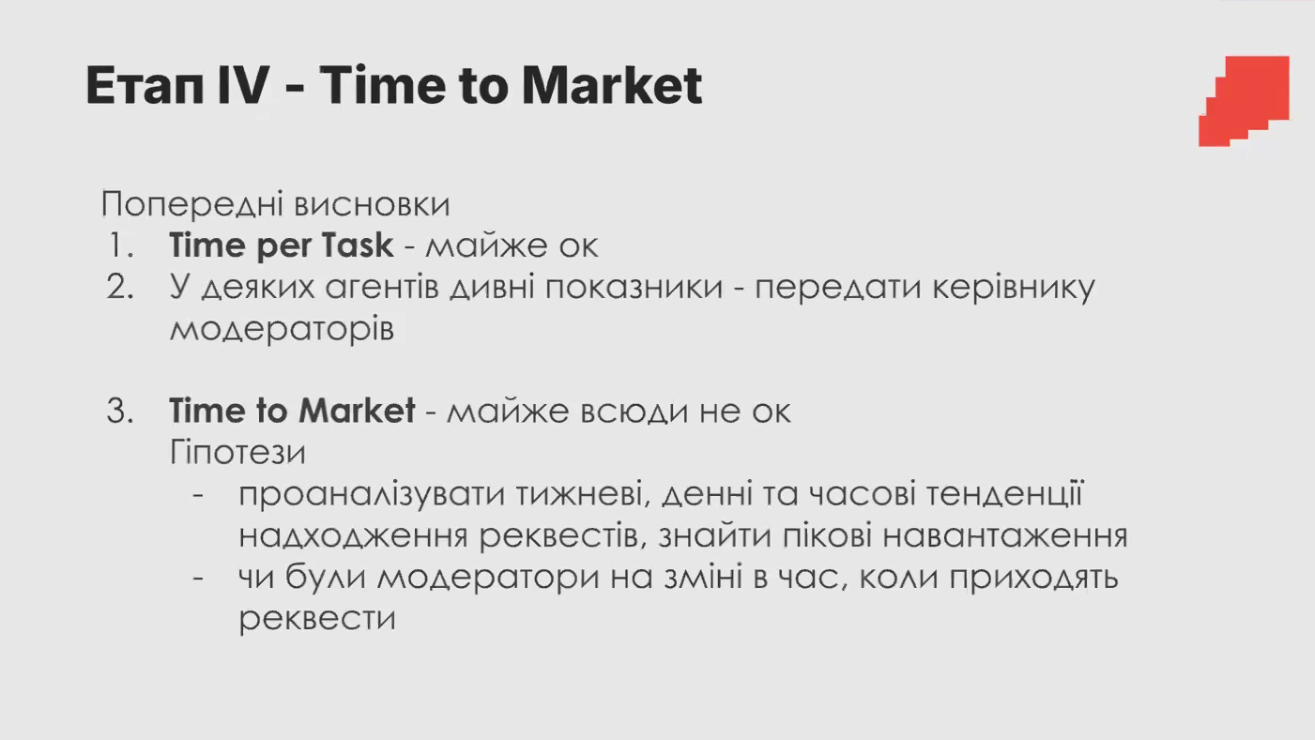

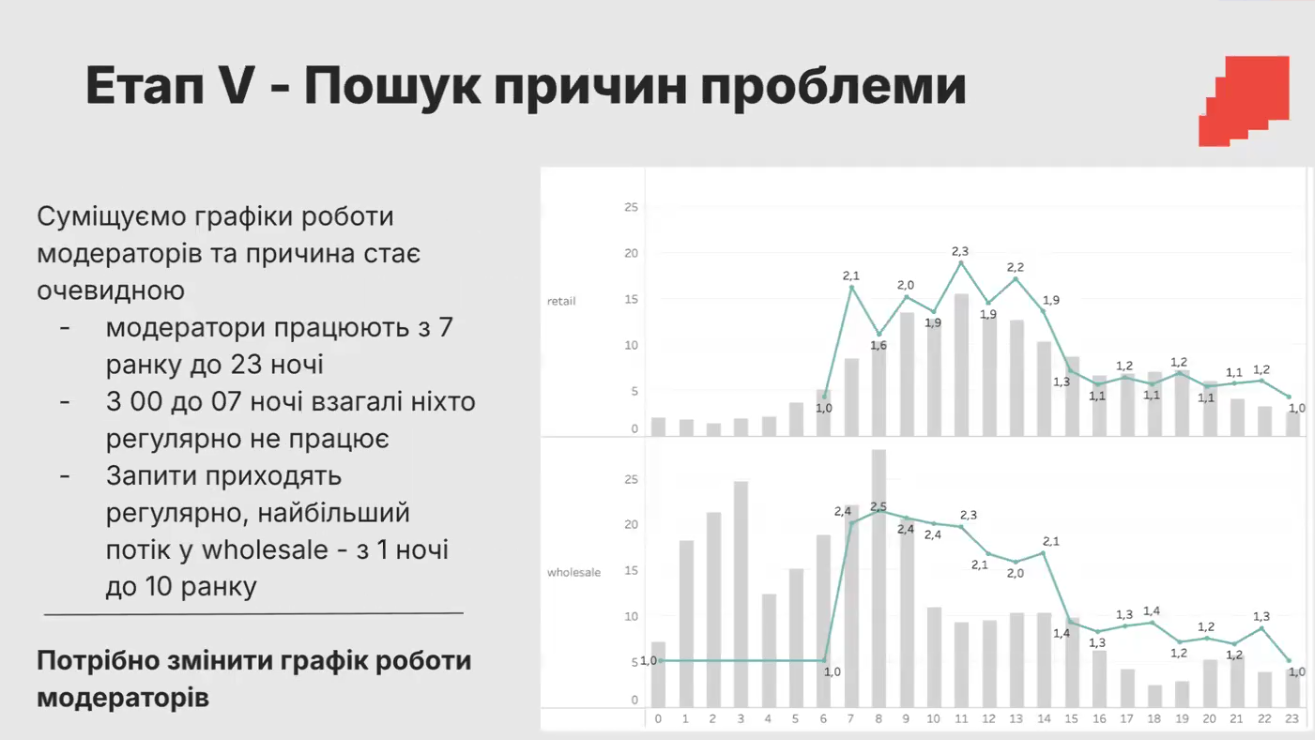

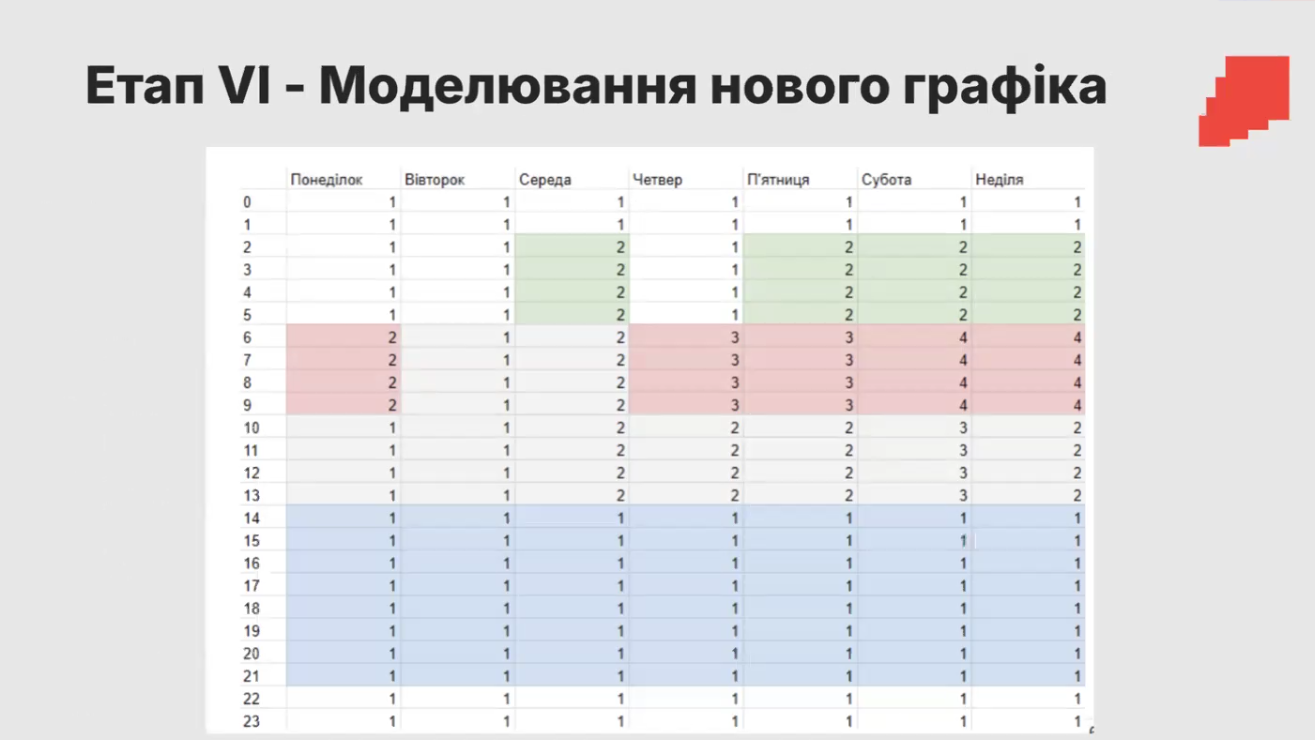

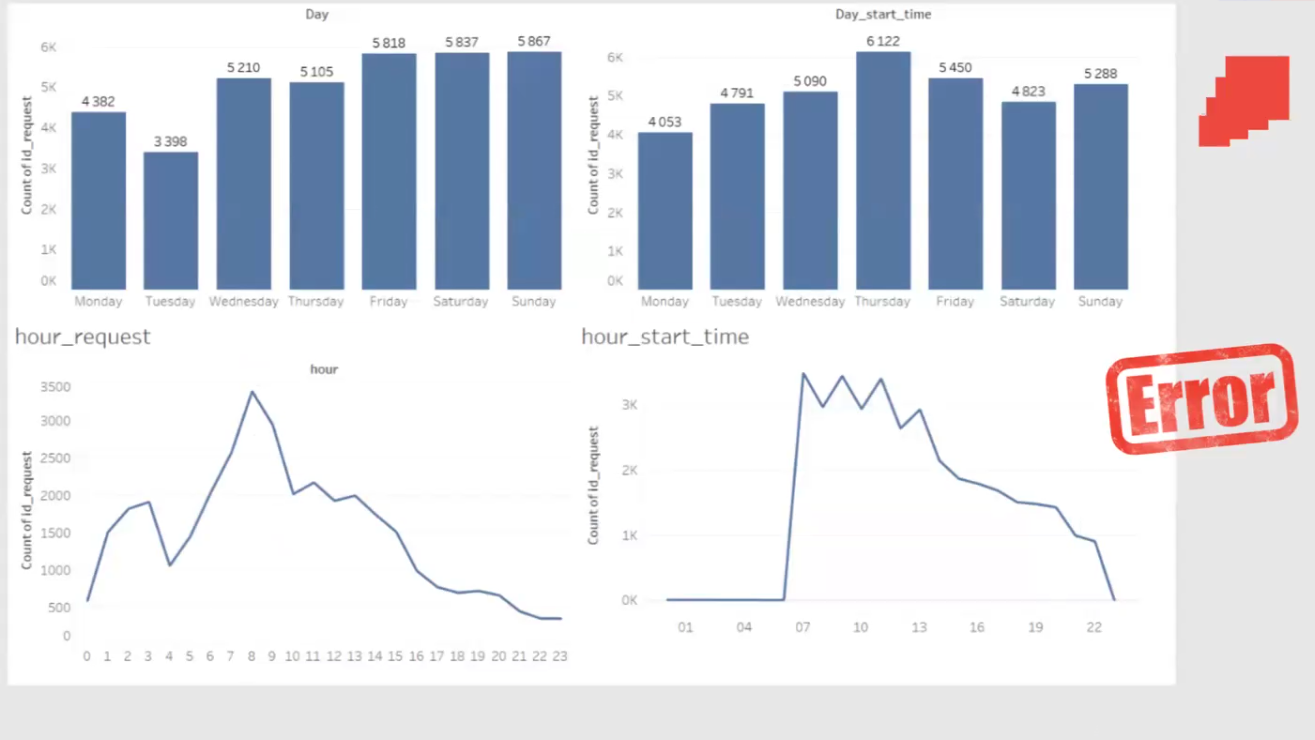

Суму не можна і анадізувати в даному випадку. Нас цікавить середнє значення, щоб зробити правильні висновки.

Пай чарти і бублики в аналітиці не викорстовувати!

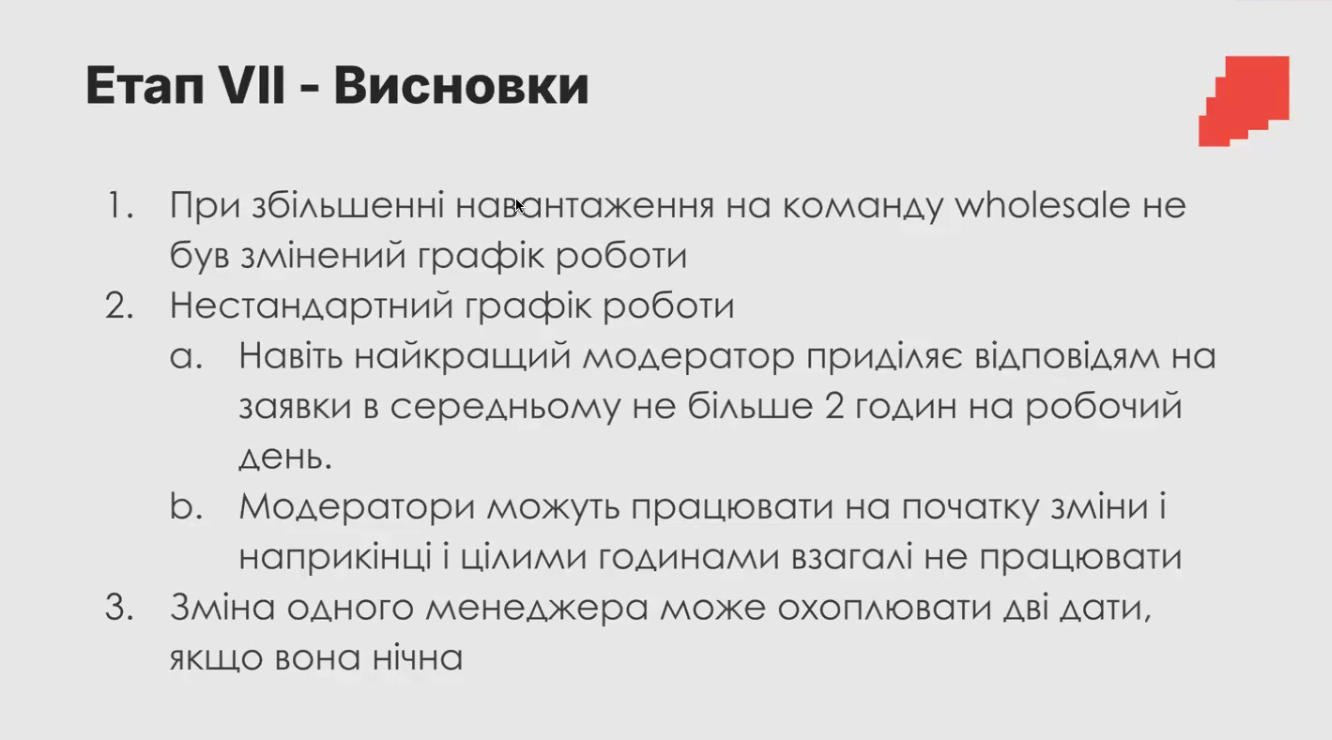

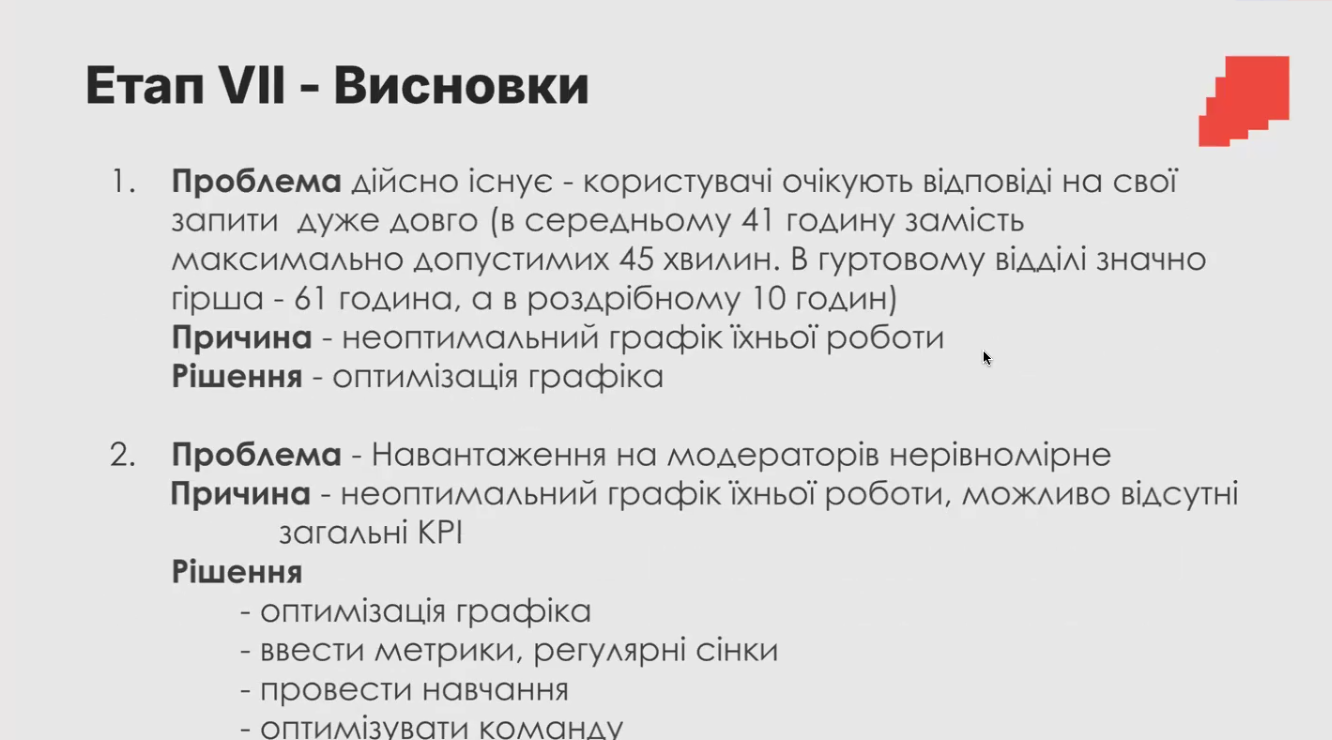

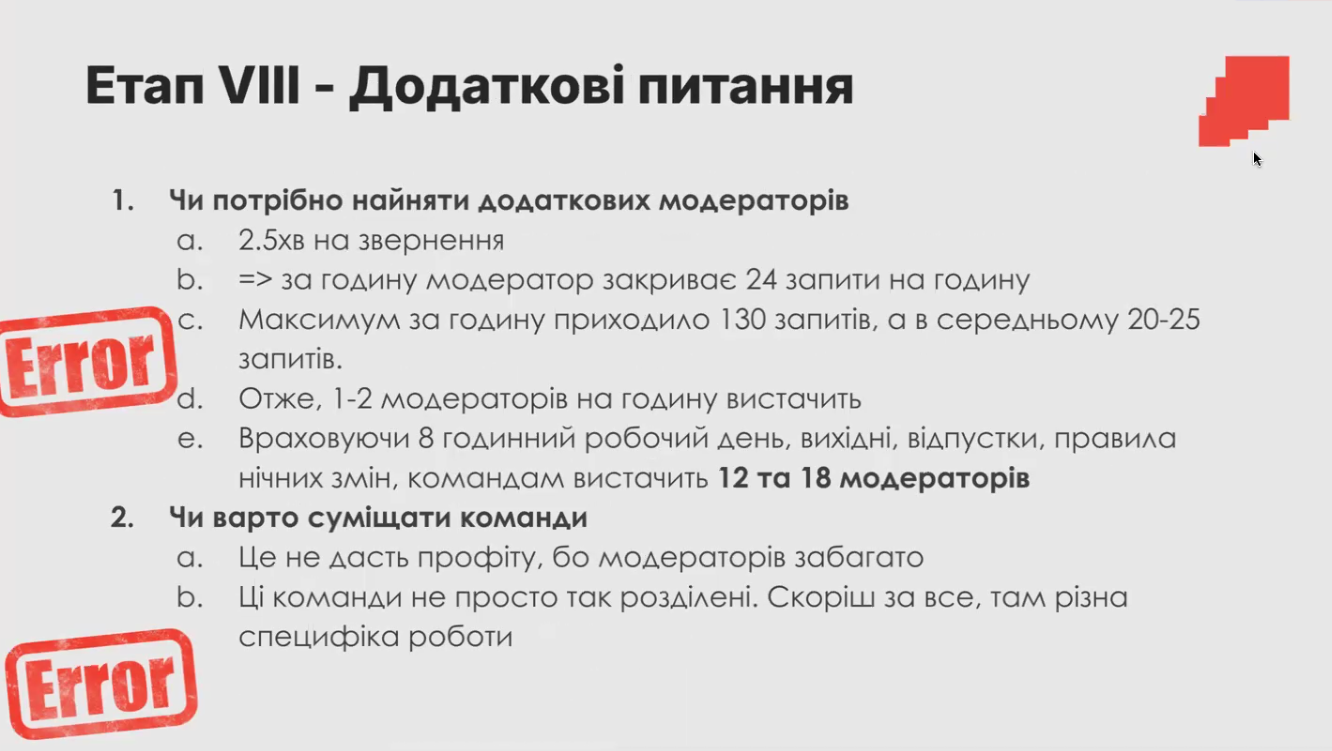